In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet

In [2]:
model = InceptionV3(input_shape = (150,150,3), include_top = False, weights = 'imagenet')

for layer in model.layers:
    layer.trainable = False

    
'''
model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
for layer in model.layers:
    layer.trainable = False
'''
'''
model = MobileNet(input_shape=(160, 160, 3), include_top=False, weights='imagenet')
'''

model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [3]:
#InceptionV3
last_layer = model.get_layer('mixed7')
last_output = last_layer.output

"""
#VGG16
last_layer = model.get_layer('block5_pool')
last_output = last_layer.output
"""
'''
#MobileNet
last_layer = model.get_layer('conv_pw_13_bn')
last_output = last_layer.output
'''

from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.regularizers import l2
opt_sgd = SGD(lr=0.00001)
opt_rms = RMSprop(lr=0.0001)


X = layers.Flatten()(last_output)
X = layers.Dense(1024, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu')(X)

"""
X = layers.Dense(128, activation='relu')(X)
X = layers.BatchNormalization()(X)
X = layers.Dropout(0.3)(X)
"""

X = layers.Dense(1, activation='sigmoid')(X)


my_model = Model(model.input, X)
my_model.compile(optimizer=opt_rms, loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
train_dir = os.path.join('./my_data/train')

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

Found 6000 images belonging to 2 classes.


In [5]:
validation_dir = os.path.join('./my_data/validation')

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size = (150, 150),
                                                              batch_size = 20,
                                                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [6]:
history = my_model.fit(
      train_generator,
      steps_per_epoch=200,
      epochs=2,
      validation_data=validation_generator,
      verbose=2)

Epoch 1/2
200/200 - 282s - loss: 6.9158 - accuracy: 0.8755 - val_loss: 2.0913 - val_accuracy: 0.9220
Epoch 2/2
200/200 - 281s - loss: 1.3016 - accuracy: 0.9065 - val_loss: 0.8228 - val_accuracy: 0.9570


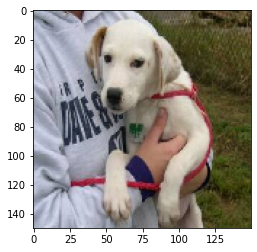

dog
accuracy: 99.99995231628418%


In [7]:
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

img = image.load_img('./my_data/test/713.jpg', target_size=(150, 150))
#img = img.resize((150, 150))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)/255
x = np.expand_dims(x, axis=0)

value = my_model.predict(x)
#print(value)
m = np.max(value)
#print("accuracy: ",max(m, 1-m))
#print(round(m, 0))
if round(m)==0:
    print("cat")
    print("accuracy: {}%".format((1-m)*100))
else:
    print("dog")
    print("accuracy: {}%".format(m*100))